In [1]:
# reloads modules when they are edited
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [3]:
# using a smaller dataset
X = mnist_data['data'][:7000]
y = mnist_data['target'][:7000]

print(X.shape)
print(y.shape)

(7000, 784)
(7000,)


In [4]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


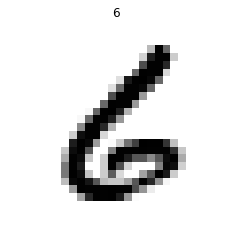

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

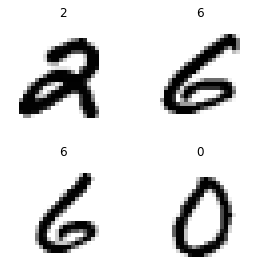

In [6]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [7]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [8]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [10]:
import sys
sys.path.append("..")

from models import Sequential
from layers import Linear, ReLU, Softmax
from losses import CategoricalCrossentropy
from metrics import categorical_accuracy
from optimizers import SGD

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(64))
model.add(ReLU())
model.add(Linear(10))
model.add(Softmax())

# using SGD with no momentum
model.configure(loss=CategoricalCrossentropy(),
                optimizer=SGD(learning_rate=0.01),
                metrics={"acc": categorical_accuracy})

# train the model
history = model.train(X_train_normalized, y_train_one_hot,
                          X_test_normalized, y_test_one_hot, epochs=100)

Epoch 01	loss=1.077897	val_loss=1.105925	acc=0.765167	val_acc=0.749000
Epoch 02	loss=0.627923	val_loss=0.665009	acc=0.844500	val_acc=0.828000
Epoch 03	loss=0.488460	val_loss=0.528684	acc=0.870500	val_acc=0.850000
Epoch 04	loss=0.416095	val_loss=0.458339	acc=0.886000	val_acc=0.865000
Epoch 05	loss=0.364597	val_loss=0.404517	acc=0.902667	val_acc=0.887000
Epoch 06	loss=0.334246	val_loss=0.376918	acc=0.910500	val_acc=0.900000
Epoch 07	loss=0.311657	val_loss=0.357271	acc=0.912500	val_acc=0.896000
Epoch 08	loss=0.286757	val_loss=0.339068	acc=0.922833	val_acc=0.903000
Epoch 09	loss=0.270792	val_loss=0.325827	acc=0.926167	val_acc=0.901000
Epoch 10	loss=0.255906	val_loss=0.315254	acc=0.932000	val_acc=0.909000
Epoch 11	loss=0.244801	val_loss=0.312836	acc=0.933333	val_acc=0.908000
Epoch 12	loss=0.231875	val_loss=0.299110	acc=0.940667	val_acc=0.915000
Epoch 13	loss=0.223038	val_loss=0.295450	acc=0.940833	val_acc=0.917000
Epoch 14	loss=0.212856	val_loss=0.292785	acc=0.941333	val_acc=0.915000
Epoch 

In [ ]:
from layers import BatchNormalization

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(BatchNormalization())
model.add(Linear(64))
model.add(ReLU())
model.add(BatchNormalization())
model.add(Linear(10))
model.add(Softmax())

# using SGD with no momentum
model.configure(loss=CategoricalCrossentropy(),
                optimizer=SGD(learning_rate=0.01),
                metrics={"acc": categorical_accuracy})

# train the model
history = model.train(X_train_normalized, y_train_one_hot,
                          X_test_normalized, y_test_one_hot, epochs=100)

Epoch 01	loss=0.547421	val_loss=0.594402	acc=0.853167	val_acc=0.832000
Epoch 02	loss=0.396830	val_loss=0.451709	acc=0.896167	val_acc=0.870000
Epoch 03	loss=0.322139	val_loss=0.379591	acc=0.916500	val_acc=0.894000
Epoch 04	loss=0.276247	val_loss=0.342021	acc=0.927667	val_acc=0.907000
Epoch 05	loss=0.243706	val_loss=0.314723	acc=0.939667	val_acc=0.905000
Epoch 06	loss=0.218309	val_loss=0.293312	acc=0.946500	val_acc=0.916000
Epoch 07	loss=0.199764	val_loss=0.277071	acc=0.950333	val_acc=0.917000
Epoch 08	loss=0.184614	val_loss=0.260001	acc=0.954500	val_acc=0.925000
Epoch 09	loss=0.169355	val_loss=0.252352	acc=0.958667	val_acc=0.925000
Epoch 10	loss=0.158082	val_loss=0.243861	acc=0.960500	val_acc=0.924000
Epoch 11	loss=0.146724	val_loss=0.237513	acc=0.963833	val_acc=0.926000
Epoch 12	loss=0.138719	val_loss=0.229092	acc=0.966667	val_acc=0.932000
Epoch 13	loss=0.130517	val_loss=0.222797	acc=0.968167	val_acc=0.934000
Epoch 14	loss=0.121827	val_loss=0.222576	acc=0.971333	val_acc=0.934000
Epoch 